In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn import metrics

import contractions

import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
yelp_data_5k = pd.read_csv(r"C:\Users\sebas\Documents\School\bachelor-final\Dataset\PROCESSED_RESTAURANT_REVIEWS_5k.csv")

In [3]:
yelp_data_5k.head()

,Unnamed: 0,reviewContent,usefulCount,coolCount,funnyCount,rating,restaurantID,reviewCleanWithStopwords,reviewCleanNoStopwords,reviewCleanPorterStemmer,reviewCleanSnowballStemmer,reviewCleanLemmatized,reviewCleanLancaster
0,0,"""'Check, Please."" The bartender was unable to ...",18,11,25,1,VZHyAmdFDreQqL0BT-zdoA,check please the bartender was unable to recom...,check please bartender unable recommend beer t...,check pleas bartend unabl recommend beer tap t...,check pleas bartend unabl recommend beer tap t...,check please bartender unable recommend beer t...,check pleas bartend un recommend beer tap tri ...
1,1,"""2 stars for disappointing food, one star for ...",14,10,7,3,tFcmrGLZNEymSnijoTPmqw,stars for disappointing food one star for grea...,stars disappointing food one star great servic...,star disappoint food one star great servic rea...,star disappoint food one star great servic rea...,star disappoint food one star great service re...,star disappoint food on star gre serv read iai...
2,2,"""A Divine Dialogue"" God: ""Britton. Times up. T...",14,16,23,5,INvIaBFnAvGxzTXFWHzGvA,divine dialogue god britton times up the world...,divine dialogue god britton times world going ...,divin dialogu god britton time world go end to...,divin dialogu god britton time world go end to...,divine dialogue god britton time world go end ...,divin dialog god britton tim world going end t...
3,3,"""A Place To Go When You Have Time"" It was a mi...",13,10,10,5,FySId5SjNhkrtPA5qktdxg,place to go when you have time it was misty br...,place go time misty breezy summer night friend...,place go time misti breezi summer night friend...,place go time misti breezi summer night friend...,place go time misty breezy summer night friend...,plac go tim misty breezy sum night friend jere...
4,4,"""A Thaiphoon of Flavor"" My First: I never enli...",27,22,28,5,RgeMUiZncTs-VSHQLm0wNg,thaiphoon of flavor my first never enlisted in...,thaiphoon flavor first never enlisted air forc...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air forc a...,thaiphoon flavor first never enlist air force ...,thaiphoon flav first nev enl air forc allow jo...


In [4]:
yelp_data_5k.rating.value_counts()

2    1250
5    1179
1    1159
3    1130
4    1051
Name: rating, dtype: int64

In [5]:
yelp_data_5k.isnull().values.any()

False

# Remove 3 stars, transform 1,2 to 0 and 4,5 to one

In [6]:
# Get names of indexes for which column rating has value 2
indexNamesRating3 = yelp_data_5k[ yelp_data_5k['rating'] == 3 ].index
 
# Delete these row indexes from dataFrame
yelp_data_5k.drop(indexNamesRating3, inplace=True)

In [7]:
yelp_data_5k.rating.value_counts()

2    1250
5    1179
1    1159
4    1051
Name: rating, dtype: int64

In [8]:
# transform 1 and 2 stars to rating 0 and 4 and 5 stars to rating 1
yelp_data_5k['rating'] = yelp_data_5k['rating'].apply(lambda x: 1 if x>3 else 0)

In [9]:
yelp_data_5k.rating.value_counts()

0    2409
1    2230
Name: rating, dtype: int64

# Allocating each text with its specific cleaning method to a variable

In [10]:
x_cleanWithStopwords = yelp_data_5k["reviewCleanWithStopwords"]
x_cleanNoStopwords = yelp_data_5k["reviewCleanNoStopwords"]
x_porterStemmer = yelp_data_5k["reviewCleanPorterStemmer"]
x_snowballStemmer = yelp_data_5k["reviewCleanSnowballStemmer"]
x_lemmatized = yelp_data_5k["reviewCleanLemmatized"]
x_lancaster = yelp_data_5k["reviewCleanLancaster"]

# Vectorisation

In [11]:
cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanWithStopwords)
x_cleanWithStopwords = cv.transform(x_cleanWithStopwords)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_cleanNoStopwords)
x_cleanNoStopwords = cv.transform(x_cleanNoStopwords)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_porterStemmer)
x_porterStemmer = cv.transform(x_porterStemmer)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_snowballStemmer)
x_snowballStemmer = cv.transform(x_snowballStemmer)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_lemmatized)
x_lemmatized = cv.transform(x_lemmatized)

cv = CountVectorizer(ngram_range=(1,2), min_df=5).fit(x_lancaster)
x_lancaster = cv.transform(x_lancaster)

In [12]:
y = yelp_data_5k["rating"]

# Splitting the data for training and testing

In [13]:
x_train_cleanWithStopwords, x_test_cleanWithStopwords, y_train, y_test = train_test_split(x_cleanWithStopwords, y, test_size=0.2, random_state=50)

x_train_cleanNoStopwords, x_test_cleanNoStopwords, y_train, y_test = train_test_split(x_cleanNoStopwords, y, test_size=0.2, random_state=50)

x_train_porterStemmer, x_test_porterStemmer, y_train, y_test = train_test_split(x_porterStemmer, y, test_size=0.2, random_state=50)

x_train_snowballStemmer, x_test_snowballStemmer, y_train, y_test = train_test_split(x_snowballStemmer, y, test_size=0.2, random_state=50)

x_train_lemmatized, x_test_lemmatized, y_train, y_test = train_test_split(x_lemmatized, y, test_size=0.2, random_state=50)

x_train_lancaster, x_test_lancaster, y_train, y_test = train_test_split(x_lancaster, y, test_size=0.2, random_state=50)

# Models
## Multinomial Naive Bayes

WITH STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[435  60]
 [ 60 373]]
Score: 87.07
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       495
           1       0.86      0.86      0.86       433

   micro avg       0.87      0.87      0.87       928
   macro avg       0.87      0.87      0.87       928
weighted avg       0.87      0.87      0.87       928

WITHOUT STOPWORDS
Confusion Matrix for Multinomial Naive Bayes:
[[449  46]
 [ 58 375]]
Score: 88.79
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       495
           1       0.89      0.87      0.88       433

   micro avg       0.89      0.89      0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928

PORTERSTEMMER
Confusion Matrix for Multinomial Naive Bayes:
[[447  48]
 [ 61 372]]
Score: 88.25
Class

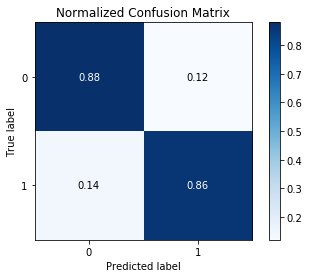

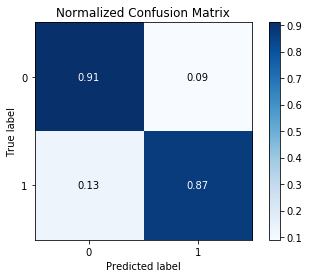

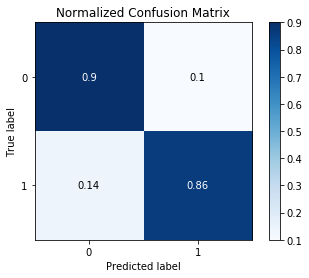

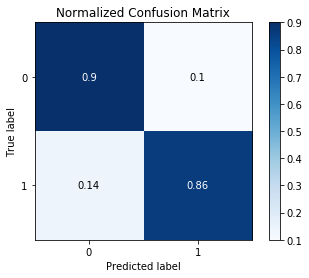

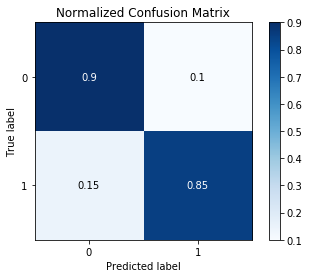

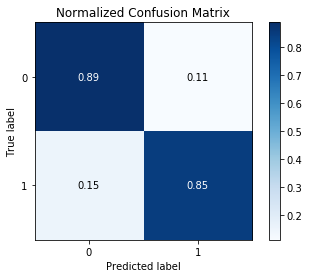

In [14]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# WITH STOPWORDS #################################################################################################################

# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanWithStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanWithStopwords)

# generating and printing confusion matrix
print("WITH STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_with_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# WITHOUT STOPWORDS #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_cleanNoStopwords, y_train)

# predicting
prediction = mnb.predict(x_test_cleanNoStopwords)

# generating and printing confusion matrix
print("WITHOUT STOPWORDS")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_no_stopwords.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# PORTERSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_porterStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_porterStemmer)

# generating and printing confusion matrix
print("PORTERSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_porterstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# SNOWBALLSTEMMER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_snowballStemmer, y_train)

# predicting
prediction = mnb.predict(x_test_snowballStemmer)

# generating and printing confusion matrix
print("SNOWBALLSTEMMER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_snowballstemmer.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LEMMATIZED #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lemmatized, y_train)

# predicting
prediction = mnb.predict(x_test_lemmatized)

# generating and printing confusion matrix
print("LEMMATIZED")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_lemmatized.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))


# LANCASTER #################################################################################################################


# initialization
mnb = MultinomialNB()
mnb.fit(x_train_lancaster, y_train)

# predicting
prediction = mnb.predict(x_test_lancaster)

# generating and printing confusion matrix
print("LANCASTER")
print("Confusion Matrix for Multinomial Naive Bayes:")
confusion_mat = confusion_matrix(y_test, prediction)
print(confusion_mat)
plot = skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

# generating and printing the accuracy score
acc_score = round(accuracy_score(y_test,prediction)*100,2)
print("Score:", acc_score)

# generating, printing and saving to excel format the classification report
class_rep = classification_report(y_test,prediction, output_dict=True)
df_class_rep = pd.DataFrame(class_rep)
df_class_rep.transpose()
df_class_rep.to_excel("cv_unibigram_mnb_lancaster.xlsx")
print("Classification Report:\n", classification_report(y_test,prediction))